## Module 4 Project - H1N1 Flu Shot ##
I will explore the data and create a model to predict what behavioral features affect the most if a person gets a vaccination for the flu or not.

This Notebook is setting up my baseline modeling and exploring more options.

In [36]:
# BASIC & PANDAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# SKLEARN & MODELING
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

# From https://contrib.scikit-learn.org/categorical-encoding/
import category_encoders as ce

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix # New to version 0.22.2

In [2]:
df = pd.read_csv('CSVs/Finalized_Dataset.csv')
df.set_index('respondent_id',inplace=True)

In [28]:
pd.options.display.max_columns = None #Turning on the option to see all columns in the dataset

In [29]:
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,h1n1_vaccine,Age,Race,Gender,Education
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,0,3,3,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,0,1,3,1,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,5.0,2.0,1.0,1,2,3,0,3
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0,2.0,0,3,3,1,0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,2.0,1,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,0,2,3,0,3
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,4.0,0,0,3,0,2
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,0,0,3,1,2


## Baseline Modeling: Random Forest Classifier ##
Now to start setting up the parameters for the modeling.

In [5]:
#Setting up the target value as y
X, y = df.drop(columns='h1n1_vaccine'),df['h1n1_vaccine']

In [6]:
#Setting up the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=8)

In [9]:
#Fitting the pipeline data to the training set
rfc = RandomForestClassifier()
pipe = make_pipeline(rfc)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [10]:
#Setting up the pred for test and train on X
test_pred = pipe.predict(X_test)
train_pred = pipe.predict(X_train)

In [11]:
#The first metric to aim for is going to be ROC_AUC
train_score = roc_auc_score(y_train, train_pred)
test_score = roc_auc_score(y_test, test_pred)

print(f'train score: {train_score}')
print(f'test score: {test_score}')

train score: 0.9899298004901862
test score: 0.7201168414625057


## Observations: ##

The starter score for the test data is at .72 which isn't great. Time to improve it.

We'll start by adding some parameters

In [12]:
#Setup some grid parameters
grid_param = {'n_estimators': [50,100],
              'class_weight': ['balanced'],
              'criterion': ['gini','entropy'],
              'max_depth': [2,4,6]
             }

In [15]:
#Fit the parameters onto our data
grid_search = GridSearchCV(rfc, grid_param, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [20]:
#Applying better parameters to see if our score will improve at all or not.
rfc_grid = grid_search.best_estimator_
rfc_grid.fit(X_train, y_train)

train_pred2 = rfc_grid.predict_proba(X_train)[:,1]
test_pred2 = rfc_grid.predict_proba(X_test)[:,1]

train_score2 = roc_auc_score(y_train, train_pred2)
test_score2 = roc_auc_score(y_test, test_pred2)

print(f'Train Score #2: {train_score2}')
print(f'Test Score #2: {test_score2}')

Train Score #2: 0.8567495659435516
Test Score #2: 0.8443405243482912


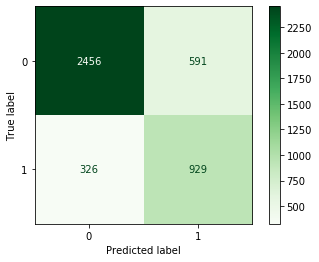

In [24]:
#See how well our model did in predicting the values
plot_confusion_matrix(rfc_grid, X_test, y_test, cmap=plt.cm.Greens, values_format='.4g')
plt.grid(False)

The matrix shows that a majority of the test data is being predicted correctly but there are still errors.

I want to look at some of the feature importances.

Feature ranking:
1. feature 14 (0.148566)
2. feature 9 (0.123272)
3. feature 13 (0.098324)
4. feature 16 (0.085151)
5. feature 19 (0.067771)
6. feature 15 (0.067767)
7. feature 0 (0.062244)
8. feature 1 (0.043653)
9. feature 17 (0.042215)
10. feature 18 (0.034525)
11. feature 8 (0.030245)
12. feature 10 (0.029839)
13. feature 6 (0.029386)
14. feature 3 (0.028168)
15. feature 7 (0.027804)
16. feature 5 (0.019432)
17. feature 11 (0.017402)
18. feature 12 (0.016897)
19. feature 4 (0.014827)
20. feature 2 (0.012513)


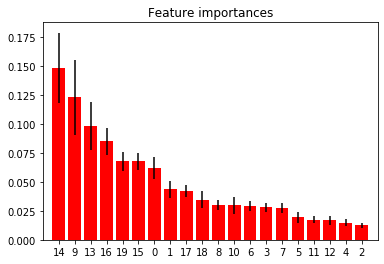

In [27]:
# Build a forest and compute the feature importances
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Trying out the Gradient Boosting Model.

In [37]:
gbt = GradientBoostingClassifier(random_state=8)

gbt.fit(X_train, y_train)

gbt_train_preds = gbt.predict(X_train)
gbt_test_preds = gbt.predict(X_test)

gbt_train_score = roc_auc_score(y_train, gbt_train_preds)
gbt_test_score = roc_auc_score(y_test, gbt_test_preds)

print(f'Gradient Boosted Tree Train Score: {gbt_train_score}')
print(f'Gradient Boosted Tree Test Score: {gbt_test_score}')

Gradient Boosted Tree Train Score: 0.7564216505634074
Gradient Boosted Tree Test Score: 0.7360791164191283


It looks like the Gradient Boost didn't provide any better results